# MLP Test 10

Explorando multiplas rodadas rodadas de classificação com vários valores possíveis de 1 camada oculta.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Carregando dados e gerando sementes

In [2]:
irisDS = load_iris()

X, y = load_iris(return_X_y=True)

hls_array = np.arange(20, 65, 3)

seed_array = np.random.randint(0, 9000, 10)

print(f'seeds: {seed_array};\nhidden_layer_sizes: {hls_array};')

seeds: [6486 3425 7229 5458 5151 1723 5594 4544 8149 4867];
hidden_layer_sizes: [20 23 26 29 32 35 38 41 44 47 50 53 56 59 62];


In [3]:
# Declarando dicionário global
acc_metrics = []

for hidden_layer in hls_array:
    # Declarando listas para armazenar acurácia, sensibilidade, matriz de confusão de cada rodada
    acc, rec, mat = [], [], []

    # 10 rodadas de classificação
    for rodada, seed in enumerate(seed_array):
        # Distribuindo os dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando Standard Scaler
        sc = StandardScaler().fit(X_pre_train)

        # Pré-processando dados
        X_train = sc.transform(X_pre_train)
        X_test = sc.transform(X_pre_test)

        # Instanciando e treinando classificador
        classifier = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
            solver='lbfgs',
            activation='tanh',
        ).fit(
            X_train,
            y_train
        )

        # Realizando predição
        y_pred = classifier.predict(X_test)

        # Gerando resultados e adicionando à lista
        acc.append(accuracy_score(y_test, y_pred))
    
    acc_metrics.append(acc)

## Analisando Acurácias

Cada linha do `DataFrame` abaixo corresponde a uma das dez rodadas de classificação, e cada coluna corresponde ao número de neurônios em uma camada oculta.

Os pesos de cada classificador foram iniciados randomicamente em cada caso, porém as distribuições de amostras para treino e teste foram as mesmas ao longo de uma mesma rodada, e podem ser reproduzidas de acordo com as sementes geradas no início.

In [4]:
accDF = pd.DataFrame(
    data=acc_metrics,
    index=[f'hls_{hidden_layer}' for hidden_layer in hls_array]
).transpose()

accDF

,hls_20,hls_23,hls_26,hls_29,hls_32,hls_35,hls_38,hls_41,hls_44,hls_47,hls_50,hls_53,hls_56,hls_59,hls_62
0,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.933333,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556
1,0.933333,0.977778,0.955556,0.955556,0.955556,0.955556,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.977778
2,0.955556,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.911111
3,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778
4,0.933333,0.955556,0.933333,0.955556,0.977778,0.888889,0.955556,0.955556,0.888889,0.955556,0.888889,0.977778,0.955556,0.977778,0.977778
5,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111
6,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556
7,0.911111,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889
8,0.888889,0.911111,0.911111,0.933333,0.955556,0.888889,0.933333,0.911111,0.888889,0.888889,0.888889,0.888889,0.888889,0.911111,0.888889
9,0.888889,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.888889,0.911111,0.911111,0.911111,0.866667


Observando o _boxplot_, nota-se mais facilmente que os resultados em geral foram bem próximos.

,hls_20,hls_23,hls_26,hls_29,hls_32,hls_35,hls_38,hls_41,hls_44,hls_47,hls_50,hls_53,hls_56,hls_59,hls_62
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.931111,0.942222,0.937778,0.940000,0.944444,0.931111,0.940000,0.940000,0.928889,0.937778,0.928889,0.937778,0.935556,0.940000,0.931111
std,0.030452,0.033457,0.031076,0.027815,0.030089,0.036963,0.029722,0.031514,0.034427,0.034427,0.038915,0.034427,0.032203,0.031514,0.042488
min,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.866667
25%,0.911111,0.911111,0.911111,0.916667,0.922222,0.894444,0.916667,0.911111,0.894444,0.911111,0.888889,0.911111,0.911111,0.911111,0.894444
50%,0.933333,0.955556,0.944444,0.955556,0.955556,0.933333,0.944444,0.955556,0.933333,0.955556,0.933333,0.955556,0.955556,0.955556,0.933333
75%,0.955556,0.972222,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.972222
max,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778


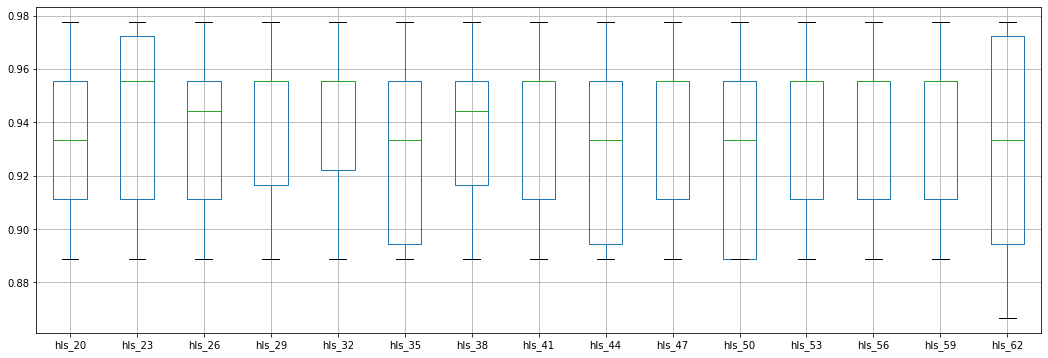

In [5]:
accDF.boxplot(figsize=(18, 6))
accDF.describe()